In [2]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
data_lines = []
with open('data/mitbih_test.csv', 'r') as f:
    for line in f:
        tmp = line.split(',')
        tmp = [float(i) for i in tmp]
        data_lines.append(tmp)

In [4]:
import numpy as np
data_lines_arr = np.array(data_lines)[:,:-1]
data_label_arr = np.array(data_lines)[:,-1]

In [5]:
import numpy as np

def remove_trailing_zeros(signal):
    """
    去掉信号末尾的连续 0
    :param signal: 输入的离散信号（NumPy 数组或列表）
    :return: 去掉末尾连续 0 后的信号
    """
    # 将输入转换为 NumPy 数组（如果已经是数组则无影响）
    signal = np.array(signal)
    
    # 找到最后一个非零元素的索引
    last_non_zero_index = np.where(signal != 0)[0][-1] if np.any(signal != 0) else -1
    
    # 去掉末尾的连续 0
    if last_non_zero_index != -1:
        return signal[:last_non_zero_index + 1]
    else:
        return np.array([])  # 如果信号全是 0，返回空数组
    
import numpy as np
from scipy.interpolate import interp1d

def spline_to_length(signal, target_length, kind='cubic'):
    """
    使用样条插值将信号填充到固定长度
    :param signal: 输入的离散信号（NumPy 数组或列表）
    :param target_length: 目标长度
    :param kind: 插值类型，默认为 'cubic'（三次样条插值），可选 'linear', 'quadratic' 等
    :return: 填充到固定长度后的信号
    """
    # 将输入转换为 NumPy 数组（如果已经是数组则无影响）
    signal = np.array(signal)
    
    # 原始信号的长度
    original_length = len(signal)
    
    # 如果目标长度小于原始长度，直接截取
    if target_length <= original_length:
        return signal[:target_length]
    
    # 生成原始信号的 x 坐标
    x_original = np.linspace(0, 1, original_length)
    
    # 生成目标长度的 x 坐标
    x_target = np.linspace(0, 1, target_length)
    
    # 创建插值函数
    interpolator = interp1d(x_original, signal, kind=kind, fill_value="extrapolate")
    
    # 对目标 x 坐标进行插值
    interpolated_signal = interpolator(x_target)
    
    return interpolated_signal

In [32]:
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/chinese/simhei.ttf'  # 黑体字体路径
font = FontProperties(fname=font_path, size=14)  # 加载字体

# plot data

(124,)


/home/wuxinze/anaconda3/envs/r/envs/torch2/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/wuxinze/anaconda3/envs/r/envs/torch2/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


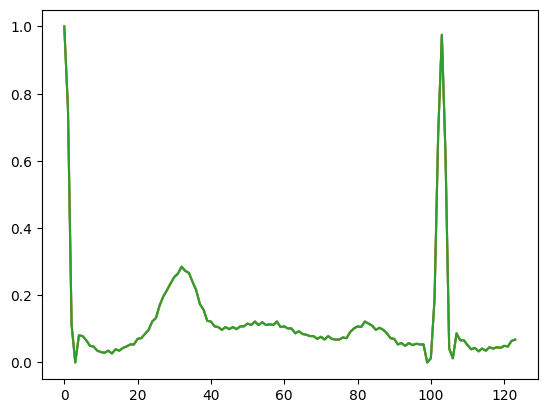

In [9]:
import matplotlib.pyplot as plt
tmp = remove_trailing_zeros(data_lines_arr[0])
print(tmp.shape)

tmp_fft = np.fft.fft(tmp)
tmp_ifft_100 = np.fft.ifft(tmp_fft[:124])
tmp_ifft = np.fft.ifft(tmp_fft)

tmp_len = spline_to_length(tmp_ifft_100,len(tmp))

plt.plot(tmp)
plt.plot(tmp_len)
plt.plot(tmp_ifft)
plt.show()

In [10]:
print(data_lines_arr.shape)
data_fft = np.fft.fft(data_lines_arr)
data_ifft = np.fft.ifft(data_fft)

(21892, 187)


In [11]:
data_fft = np.fft.fft(data_lines_arr[0])

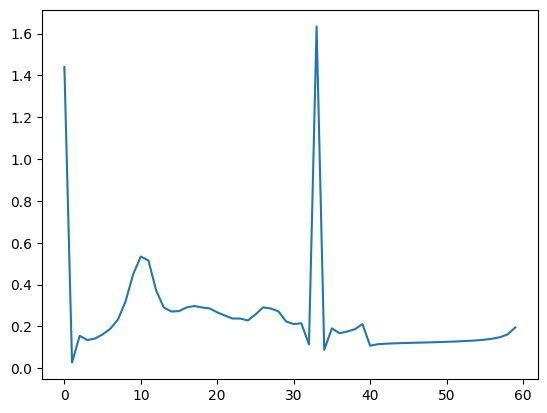

In [12]:
data_ifft = np.fft.ifft(data_fft[:60])
plt.plot(data_ifft)
plt.show()

In [13]:
mapping_dic = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

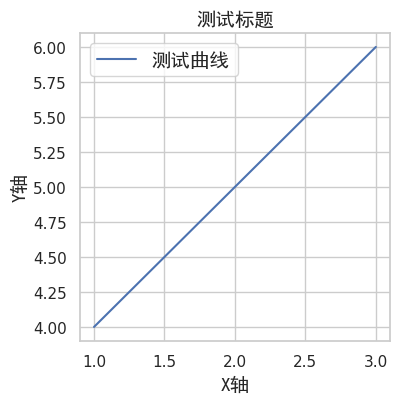

In [33]:
# 绘图
plt.figure(figsize=(4,4))
plt.plot([1, 2, 3], [4, 5, 6], label='测试曲线')
plt.title('测试标题', fontproperties=font)
plt.xlabel('X轴', fontproperties=font)
plt.ylabel('Y轴', fontproperties=font)
plt.legend(prop=font)
plt.show()

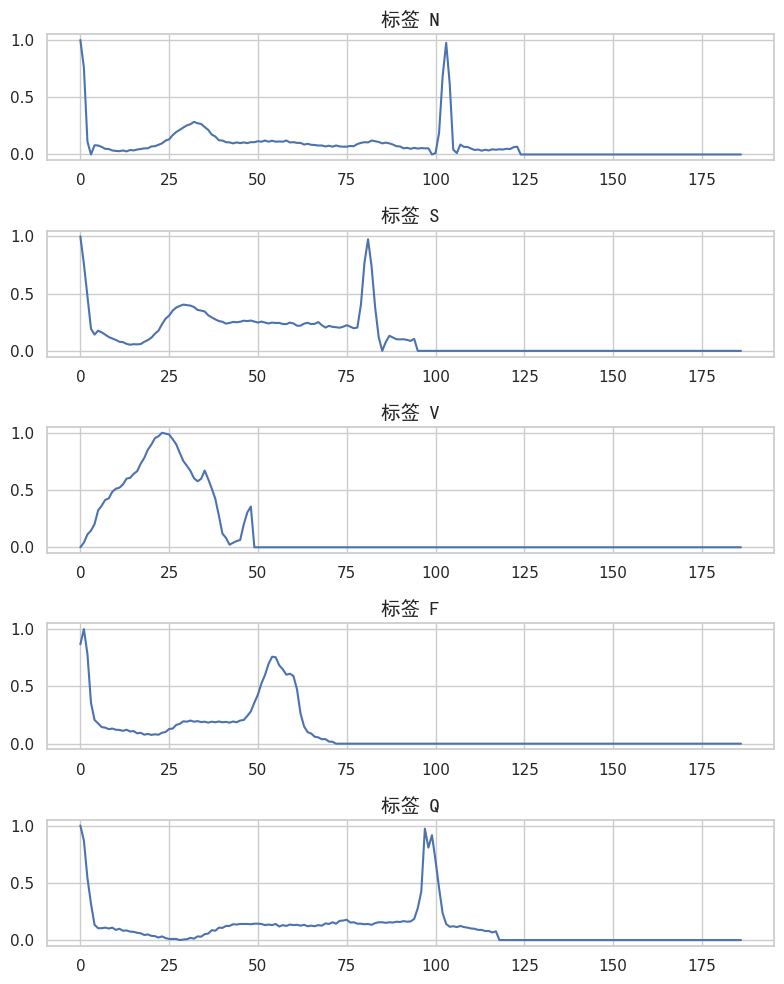

In [37]:
from matplotlib import pyplot as plt

# 假设 data_lines 是你的数据，每个元素的最后一个值是标签
# data_lines 是一个列表，其中每个元素是一个列表或数组，最后一个值是标签

# 创建一个包含 5 个子图的图形
fig, axes = plt.subplots(5, 1, figsize=(8, 10))  # 5 行 1 列的子图布局

# 绘制第一个子图（标签为 0 的数据）
axes[0].plot(data_lines[0][:-1])  # 绘制第一个数据，去掉最后一个标签值
axes[0].set_title('标签 N',fontproperties=font)

# 遍历数据，找到标签为 1、2、3、4 的数据并绘制
labels_to_find = [1, 2, 3, 4]

for idx, label in enumerate(labels_to_find, start=1):  # 从 1 开始，因为第一个子图已经用了
    for i in data_lines:
        if i[-1] == label:
            axes[idx].plot(i[:-1])  # 绘制数据，去掉最后一个标签值
            axes[idx].set_title(f'标签 {mapping_dic[label]}',fontproperties=font)
            break  # 找到第一个匹配的数据后跳出循环

# 调整子图之间的间距
plt.tight_layout()

# 保存图像
plt.savefig('fig/subplots.pdf')  # 保存为 subplots.png，分辨率为 300 dpi

# 显示图形
plt.show()
             

In [61]:
pd.DataFrame(data_label_arr)[0].value_counts()

0
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64

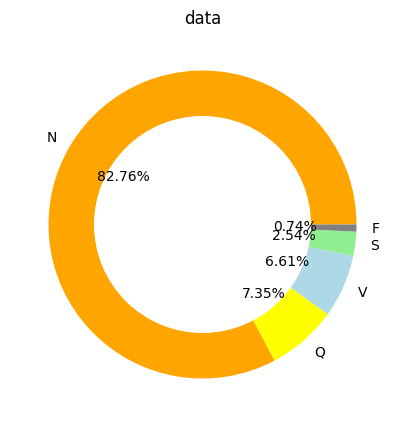

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(pd.DataFrame(data_label_arr)[0].value_counts(), labels=['N','Q','V','S','F'],
        colors=['orange','yellow','lightblue','lightgreen','grey'], autopct='%.2f%%')
plt.gcf().gca().add_artist(plt.Circle((0,0),0.7,color='white'))
plt.title('data')
plt.savefig('fig/label.pdf')
plt.show()

# denoise

In [35]:
pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 250.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 814.9 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 2.7 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [38]:
from scipy.signal import butter, filtfilt
import pywt

In [108]:
import pywt
import numpy as np
from scipy.signal import butter, filtfilt

# 方法 1: 小波变换去噪
def wavelet_denoise_ecg(signal, wavelet='sym4', level=4):
    """
    使用小波变换进行ECG信号去噪
    :param signal: 输入信号
    :param wavelet: 小波基函数，'sym4' 或 'db6' 常用于ECG
    :param level: 分解层数，ECG信号通常分解到4-6层
    :return: 去噪后的信号
    """
    # 小波分解
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    threshold_values = []
    for i in range(1, len(coeffs)): # 第一个系数是近似系数，通常不进行阈值处理或轻微处理

        sigma = np.median(np.abs(coeffs[i])) / 0.6745 # 使用MAD估计噪声标准差
        threshold = sigma * np.sqrt(2 * np.log(len(signal)))
        threshold_values.append(threshold)

    new_coeffs = [coeffs[0]] # 保留近似系数
    for i in range(1, len(coeffs)):
        new_coeffs.append(pywt.threshold(coeffs[i], threshold_values[i-1], mode='soft'))

    # 小波重构
    denoised_signal = pywt.waverec(new_coeffs, wavelet)
    # 确保输出信号长度与输入信号一致
    return denoised_signal[:len(signal)]

# 方法 2: 低通滤波去噪
def lowpass_filter_ecg(signal, cutoff=40, fs=500, order=4):
    """
    使用低通滤波器进行ECG信号去噪，主要去除高频噪声如肌肉电干扰
    :param signal: 输入信号
    :param cutoff: 截止频率（Hz），对于ECG，通常保留到35-45Hz以保留QRS波群等重要特征
    :param fs: 采样频率 (Hz)
    :param order: 滤波器阶数，常用2-5阶
    :return: 去噪后的信号
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    # 增加阶数可以获得更陡峭的滚降，但可能引入相位失真，filtfilt可以部分解决
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    denoised_signal = filtfilt(b, a, signal)
    return denoised_signal

# 方法 3: 带通滤波去噪
def bandpass_filter_ecg(signal, lowcut=0.5, highcut=45, fs=500, order=3):
    """
    使用带通滤波器进行ECG信号去噪，去除基线漂移和高频噪声
    :param signal: 输入信号
    :param lowcut: 低频截止频率 (Hz)，去除基线漂移，通常0.05Hz到0.5Hz
    :param highcut: 高频截止频率 (Hz)，去除高频噪声，保留ECG主要成分，通常35Hz到100Hz，临床常用45Hz或50Hz
    :param fs: 采样频率 (Hz)
    :param order: 滤波器阶数，常用2-5阶
    :return: 去噪后的信号
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    # 确保 low < high
    if low >= high:
        raise ValueError("lowcut must be less than highcut")
    b, a = butter(order, [low, high], btype='band', analog=False)
    denoised_signal = filtfilt(b, a, signal)
    return denoised_signal

# 方法 4: 中值滤波去噪
def median_filter_ecg(signal, kernel_size=5):
    """
    使用中值滤波器进行去噪
    :param signal: 输入信号
    :param kernel_size: 滤波器窗口大小
    :return: 去噪后的信号
    """
    denoised_signal = medfilt(signal, kernel_size=kernel_size)
    return denoised_signal

# 方法 5: 卡尔曼滤波去噪
def kalman_filter_ecg(signal, transition_cov=1e-5, observation_cov=1e-2):
    """
    使用卡尔曼滤波器进行去噪
    :param signal: 输入信号
    :param transition_cov: 过程噪声协方差
    :param observation_cov: 观测噪声协方差
    :return: 去噪后的信号
    """
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(signal, n_iter=5)
    (filtered_state_means, filtered_state_covariances) = kf.filter(signal)
    return filtered_state_means.flatten()


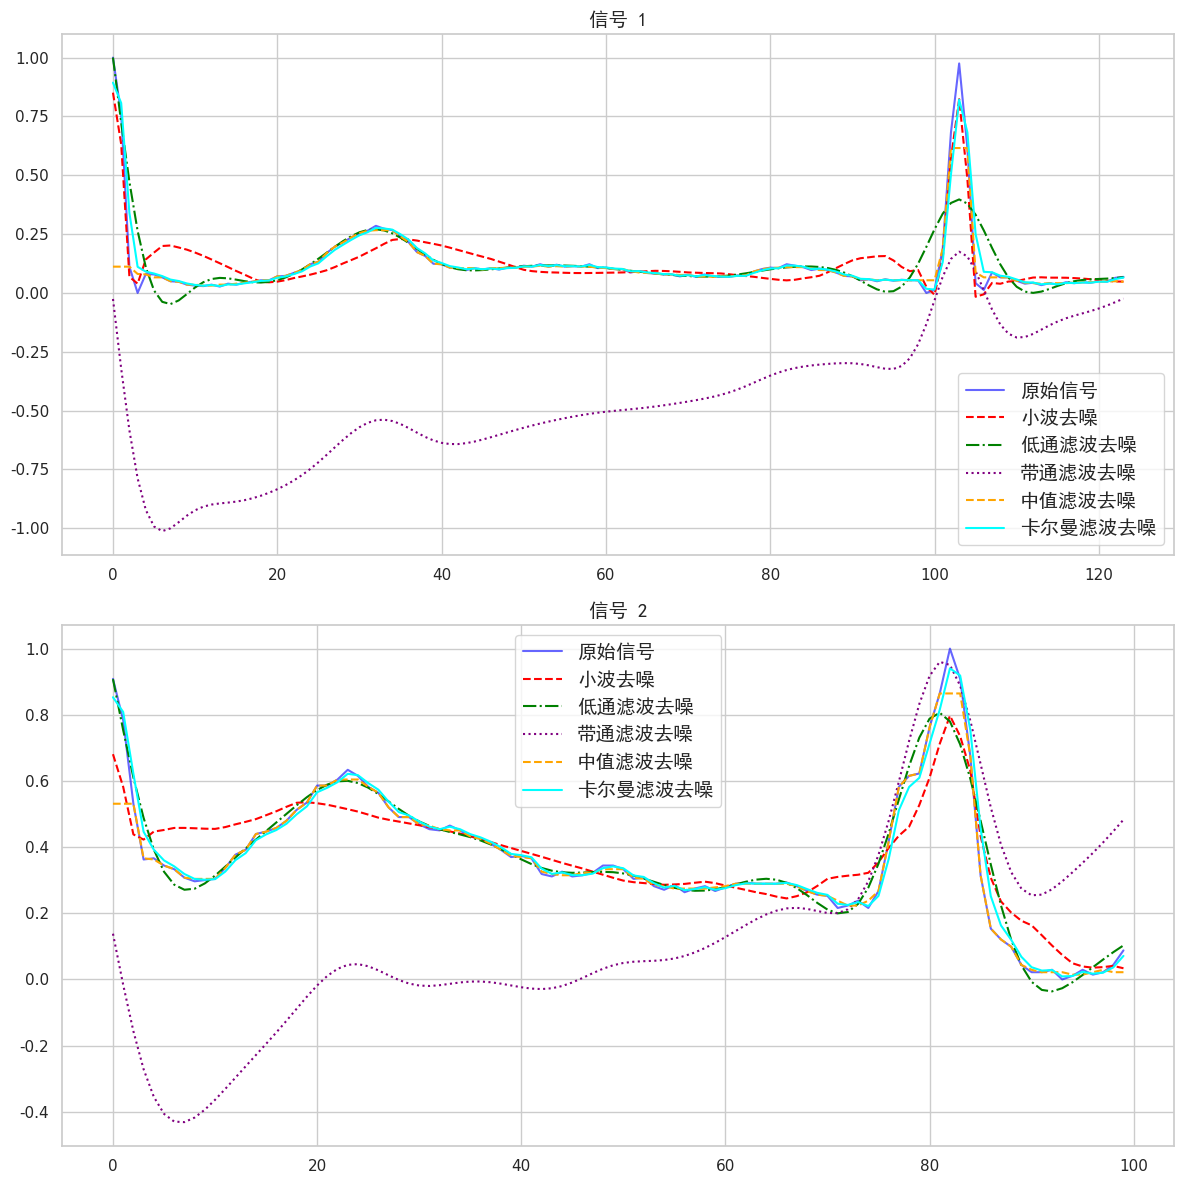

In [109]:
test_signals = data_lines_arr[:2]

# 对测试信号进行去噪
denoised_wavelet = [wavelet_denoise_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_lowpass = [lowpass_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_bandpass = [bandpass_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_median = [median_filter(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_kalman = [kalman_filter(remove_trailing_zeros(signal)) for signal in test_signals]

# 可视化原始信号和去噪后的信号
plt.figure(figsize=(12, 12))

for i in range(len(test_signals)):
    plt.subplot(len(test_signals), 1, i + 1)
    plt.plot(remove_trailing_zeros(test_signals[i]), label='原始信号', color='blue', alpha=0.6)
    plt.plot(denoised_wavelet[i], label='小波去噪', color='red', linestyle='--')
    plt.plot(denoised_lowpass[i], label='低通滤波去噪', color='green', linestyle='-.')
    plt.plot(denoised_bandpass[i], label='带通滤波去噪', color='purple', linestyle=':')
    plt.plot(denoised_median[i], label='中值滤波去噪', color='orange', linestyle='--')
    plt.plot(denoised_kalman[i], label='卡尔曼滤波去噪', color='cyan', linestyle='-')
    
    plt.title(f'信号 {i + 1}', fontproperties=font)
    
    plt.legend(prop=font)
plt.tight_layout()
plt.savefig('./fig/filter1.pdf')
plt.show()


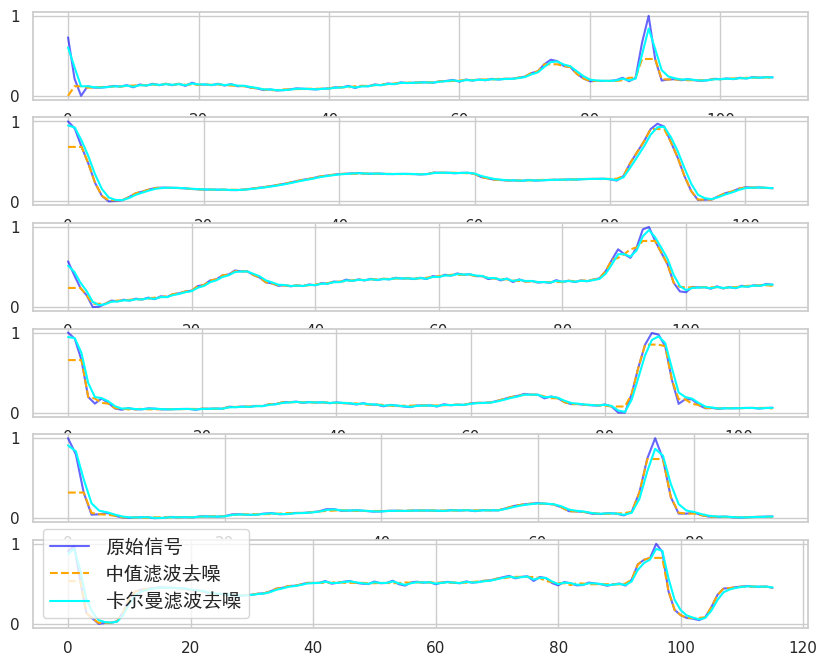

In [124]:
# 看后两个
test_signals = data_lines_arr[2:8]
plt.figure(figsize=(10, 8))
denoised_median = [median_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_kalman = [kalman_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]

for i in range(len(test_signals)):
    plt.subplot(len(test_signals), 1, i + 1)
    plt.plot(remove_trailing_zeros(test_signals[i]), label='原始信号', color='blue', alpha=0.6)
    plt.plot(denoised_median[i], label='中值滤波去噪', color='orange', linestyle='--')
    plt.plot(denoised_kalman[i], label='卡尔曼滤波去噪', color='cyan', linestyle='-')

plt.legend(prop=font)
plt.savefig('./fig/filter2.pdf')
plt.show()

In [110]:
def calculate_snr(clean_signal, noise):
    """
    计算信噪比 (SNR) 单位: dB
    :param clean_signal: 干净的 ECG 信号 (ndarray)
    :param noise: 噪声信号 (ndarray)
    :return: SNR (dB)
    """
    signal_power = np.mean(clean_signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [111]:
# 测试信号
test_signals = data_lines_arr[:100] # 增加测试数据量

# 对测试信号进行去噪
denoised_wavelet = [wavelet_denoise_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_lowpass = [lowpass_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_bandpass = [bandpass_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_median = [median_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]
denoised_kalman = [kalman_filter_ecg(remove_trailing_zeros(signal)) for signal in test_signals]

# 假设原始信号是干净的信号，计算每种方法的信噪比
snr_wavelet = [calculate_snr(remove_trailing_zeros(signal), remove_trailing_zeros(signal) - denoised_wavelet[i]) for i, signal in enumerate(test_signals)]
snr_lowpass = [calculate_snr(remove_trailing_zeros(signal), remove_trailing_zeros(signal) - denoised_lowpass[i]) for i, signal in enumerate(test_signals)]
snr_bandpass = [calculate_snr(remove_trailing_zeros(signal), remove_trailing_zeros(signal) - denoised_bandpass[i]) for i, signal in enumerate(test_signals)]
snr_median = [calculate_snr(remove_trailing_zeros(signal), remove_trailing_zeros(signal) - denoised_median[i]) for i, signal in enumerate(test_signals)]
snr_kalman = [calculate_snr(remove_trailing_zeros(signal), remove_trailing_zeros(signal) - denoised_kalman[i]) for i, signal in enumerate(test_signals)]


In [112]:
(remove_trailing_zeros(test_signals[0]) - denoised_kalman[0]).shape

(124,)

In [113]:
(remove_trailing_zeros(test_signals[0]) - denoised_median[0]).shape

(124,)

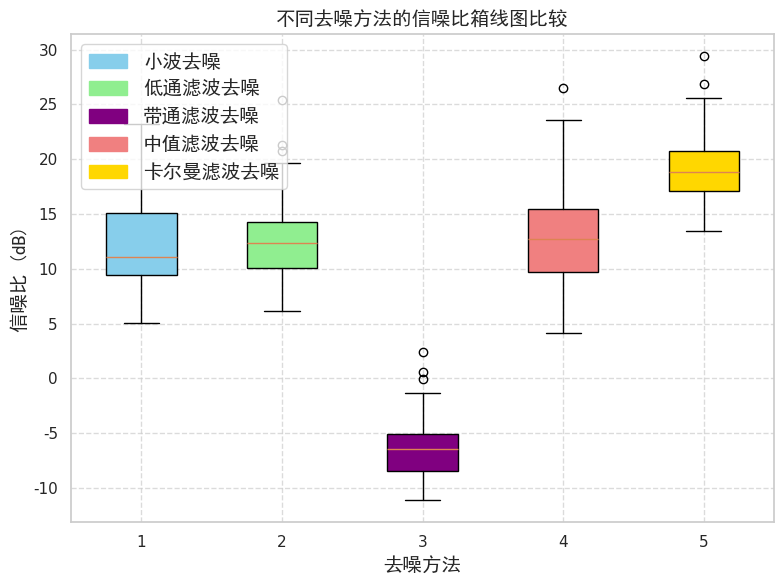

In [126]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.patches as mpatches
# 绘制信噪比比较图
plt.figure(figsize=(8, 6)) # 调整图表大小以更好显示
methods = ['小波去噪', '低通滤波去噪', '带通滤波去噪', '中值滤波去噪', '卡尔曼滤波去噪']
snr_values = [snr_wavelet, snr_lowpass, snr_bandpass, snr_median, snr_kalman]

# 定义颜色列表
colors = ['skyblue', 'lightgreen', 'purple', 'lightcoral', 'gold']

# 绘制箱线图，并设置 patch_artist=True 以填充颜色
bp = plt.boxplot(snr_values, patch_artist=True)

# 给每个箱体设置颜色
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('去噪方法', fontproperties=font)
plt.ylabel('信噪比 (dB)', fontproperties=font)
plt.title('不同去噪方法的信噪比箱线图比较', fontproperties=font)
plt.grid(True, linestyle='--', alpha=0.7) # 改进网格线样式

# 创建图例
legend_handles = []
for i, method in enumerate(methods):
    legend_handles.append(mpatches.Patch(color=colors[i], label=method))

plt.legend(handles=legend_handles, prop=font, loc='upper left') # 将图例放置在左上角
plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域
plt.savefig('./fig/snr_boxplot_comparison_colored.pdf') # 更改保存文件名以区分
plt.show()

In [84]:
data_lines_arr[:10].shape

(10, 187)

In [101]:
data_arr = []
for tmp in tqdm(data_lines_arr):
    data_arr.append(spline_to_length(kalman_filter(remove_trailing_zeros(tmp)).ravel(),187))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21892/21892 [2:17:08<00:00,  2.66it/s]


In [102]:
arr = np.array(data_arr)

In [103]:
res = np.concatenate((arr, data_label_arr.reshape(-1, 1)), axis=1)
np.save('./data/mitbih_test.npy', res)

In [117]:
res = np.load('./data/mitbih_test.npy')

In [120]:
arr = res[:,:-1]

## 确定变换

In [138]:
from scipy.fftpack import dct, idct

# DCT 变换
dct_result = dct(arr[0], norm='ortho')

# IDCT 逆变换
idct_result = idct(dct_result, norm='ortho')

# 验证重建的准确性
print("重建误差:", np.linalg.norm(arr[0] - idct_result))

重建误差: 7.151206854868004e-16


In [146]:
num = 1000

tmp_fft = np.fft.fft(arr[:num])
tmp_ifft = np.fft.ifft(tmp_fft)

print("重建误差:", np.linalg.norm(arr[:num] - tmp_ifft)/num)

重建误差: 4.008544672120795e-17


In [148]:
num = 1000

tmp_dct = dct(arr[:num], norm='ortho')
tmp_idct = idct(tmp_dct, norm='ortho')

print("重建误差:", np.linalg.norm(arr[:num] - tmp_idct)/num)

重建误差: 4.482579630034399e-17


DCT-1 重构误差: 4.2407213815344946e-17
DCT-2 重构误差: 4.705007098721025e-17
DCT-3 重构误差: 5.0889952608858684e-17
DCT-4 重构误差: 5.547714860990966e-17


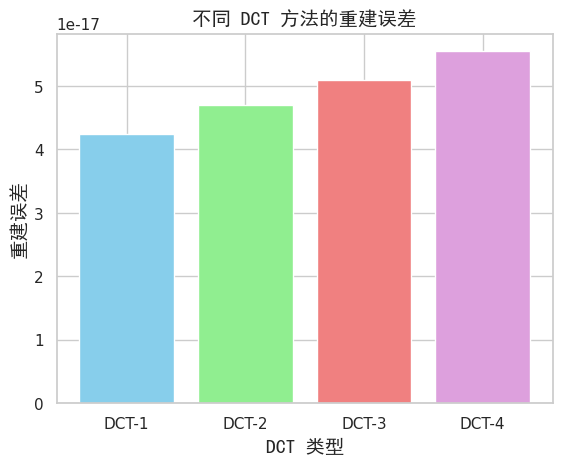

In [121]:
import random
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# 生成示例数据
num = 1000

random_indices = np.random.choice(arr.shape[0], num, replace=False)  # 随机选择列索引
random_elements = arr[random_indices] 


# 定义 DCT 类型
dct_types = [1, 2, 3, 4]
errors = []

# 计算每种 DCT 类型的重构误差
for dct_type in dct_types:
    # DCT 变换
    tmp_dct = dct(random_elements, type=dct_type, norm='ortho')
    # IDCT 逆变换
    tmp_idct = idct(tmp_dct, type=dct_type, norm='ortho')
    # 计算重构误差
    error = np.linalg.norm(random_elements - tmp_idct) / num
    errors.append(error)
    print(f"DCT-{dct_type} 重构误差: {error}")

# 绘制柱状图
plt.bar(dct_types, errors, color=['skyblue', 'lightgreen', 'lightcoral', 'plum'])

plt.xlabel('DCT 类型', fontproperties=font)
plt.ylabel('重建误差', fontproperties=font)
plt.title('不同 DCT 方法的重建误差', fontproperties=font)

plt.xticks(dct_types, labels=[f'DCT-{t}' for t in dct_types])
plt.savefig('./fig/Reconstruction-Error-for-Different-DCT.pdf')

plt.show()

FFT 重构误差: 4.3821494274459886e-17
DCT 重构误差: 4.705007098721025e-17
Wavelet 重构误差: 9.061719091832006e-17


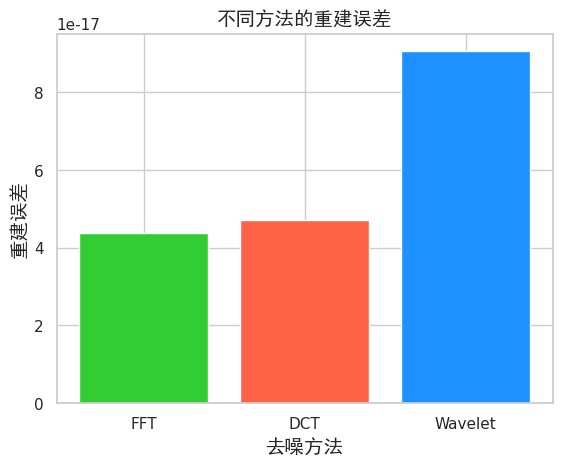

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct, fft, ifft
import pywt  # 小波变换库


# 定义变换方法
def fourier_transform(x):
    coeffs = fft(x)
    reconstructed = ifft(coeffs).real
    return reconstructed

def dct_transform(x):
    coeffs = dct(x, norm='ortho')
    reconstructed = idct(coeffs, norm='ortho')
    return reconstructed

def wavelet_transform(x):
    # 使用 Daubechies 小波进行分解
    coeffs = pywt.wavedec(x, 'db1', level=4)
    # 重构信号
    reconstructed = pywt.waverec(coeffs, 'db1')
    # 确保重构信号长度与原始信号一致
    if len(reconstructed) > len(x):
        reconstructed = reconstructed[:len(x)]  # 截断
    elif len(reconstructed) < len(x):
        padding = np.zeros(len(x) - len(reconstructed))
        reconstructed = np.concatenate([reconstructed, padding])  # 填充
    return reconstructed

# 计算重构误差
def calculate_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / len(original)

# 比较不同变换
methods = {
    'FFT': fourier_transform,
    'DCT': dct_transform,
    'Wavelet': wavelet_transform
}

errors = {}
for name, transform in methods.items():
    reconstructed = transform(random_elements)[:,:187]
    error = calculate_error(random_elements, reconstructed)
    errors[name] = error
    print(f"{name} 重构误差: {error}")

# 绘制柱状图
plt.bar(errors.keys(), errors.values(), color=['limegreen', 'tomato', 'dodgerblue'])
plt.xlabel('去噪方法', fontproperties=font)
plt.ylabel('重建误差', fontproperties=font)
plt.title('不同方法的重建误差', fontproperties=font)
plt.savefig('./fig/Reconstruction-Error-for-Different-Methods.pdf')
plt.show()

# plot net

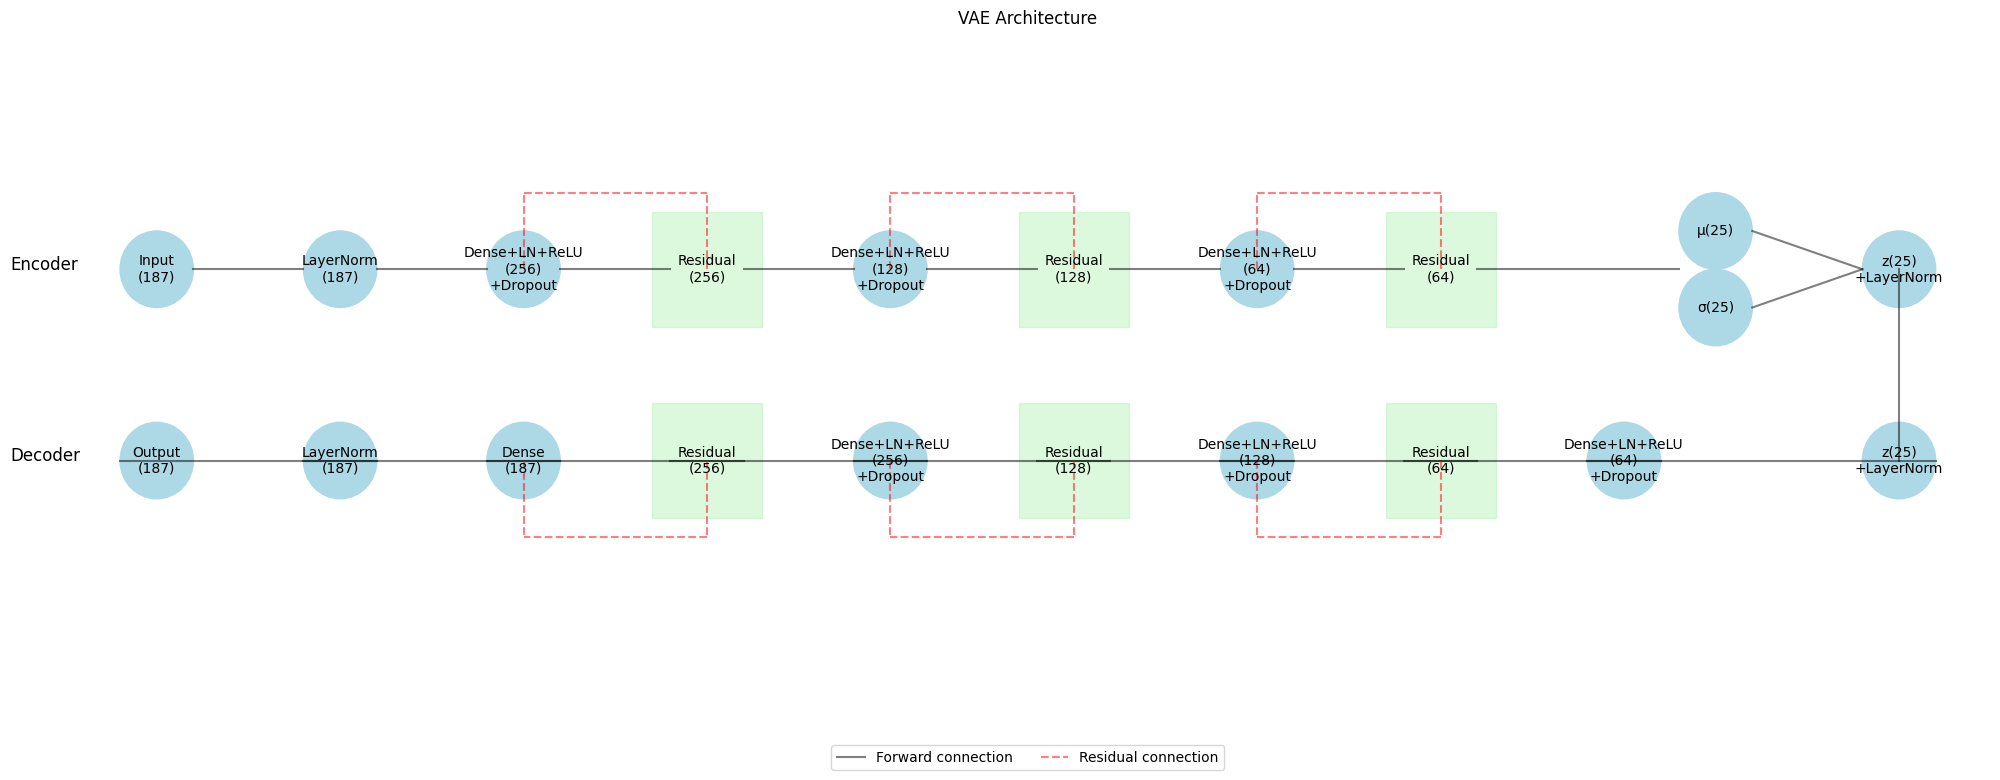

In [30]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(20, 8))

# 设置背景色
ax.set_facecolor('#f0f0f0')

# 定义编码器层结构
encoder_layers = [
    ('Input\n(187)', 0),
    ('LayerNorm\n(187)', 1),
    ('Dense+LN+ReLU\n(256)\n+Dropout', 2),
    ('Residual\n(256)', 3),
    ('Dense+LN+ReLU\n(128)\n+Dropout', 4),
    ('Residual\n(128)', 5),
    ('Dense+LN+ReLU\n(64)\n+Dropout', 6),
    ('Residual\n(64)', 7),
    ('μ(25)', 8.5),
    ('σ(25)', 8.5),
    ('z(25)\n+LayerNorm', 9.5),
]

# 定义解码器层结构(完全反转)
decoder_layers = [
    ('z(25)\n+LayerNorm', 9.5),
    ('Dense+LN+ReLU\n(64)\n+Dropout', 8),
    ('Residual\n(64)', 7),
    ('Dense+LN+ReLU\n(128)\n+Dropout', 6),
    ('Residual\n(128)', 5),
    ('Dense+LN+ReLU\n(256)\n+Dropout', 4),
    ('Residual\n(256)', 3),
    ('Dense\n(187)', 2),
    ('LayerNorm\n(187)', 1),
    ('Output\n(187)', 0),
]

def draw_layers(layers, y_offset, is_encoder=True):
    # 绘制节点
    for name, pos in layers:
        y = y_offset
        x = pos
        if 'μ' in name and is_encoder:  # μ 节点
            ax.add_patch(plt.Circle((x, y+0.2), 0.2, color='lightblue'))
            ax.text(x, y+0.2, name, ha='center', va='center')
        elif 'σ' in name and is_encoder:  # σ 节点
            ax.add_patch(plt.Circle((x, y-0.2), 0.2, color='lightblue'))
            ax.text(x, y-0.2, name, ha='center', va='center')
        elif 'Residual' in name:  # 残差块
            rect = plt.Rectangle((x-0.3, y-0.3), 0.6, 0.6, color='lightgreen', alpha=0.3)
            ax.add_patch(rect)
            ax.text(x, y, name, ha='center', va='center')
        else:  # 其他节点
            ax.add_patch(plt.Circle((x, y), 0.2, color='lightblue'))
            ax.text(x, y, name, ha='center', va='center')

    # 绘制主路径连接
    for i in range(len(layers)-1):
        if 'μ' not in layers[i][0] and 'σ' not in layers[i][0]:
            x1 = layers[i][1] + 0.2
            x2 = layers[i+1][1] - 0.2
            if not (is_encoder and i == 8):  # 不是μ,σ到z的连接
                if is_encoder:
                    ax.plot([x1, x2], [y_offset, y_offset], 'k-', alpha=0.5, 
                           )
                else:
                    ax.plot([x1, x2], [y_offset, y_offset], 'k-', alpha=0.5,
                           )

    # 绘制μ,σ到z的特殊连接（仅编码器）
    if is_encoder:
        ax.plot([8.7, 9.3], [y_offset+0.2, y_offset], 'k-', alpha=0.5)  # μ to z
        ax.plot([8.7, 9.3], [y_offset-0.2, y_offset], 'k-', alpha=0.5)  # σ to z

    # 绘制残差连接
    residual_positions = [2, 4, 6] if is_encoder else [3, 5, 7]
    for i in residual_positions:
        if is_encoder:
            ax.plot([i, i+1], [y_offset+0.4, y_offset+0.4], 'r--', alpha=0.5)
            ax.plot([i, i], [y_offset, y_offset+0.4], 'r--', alpha=0.5)
            ax.plot([i+1, i+1], [y_offset, y_offset+0.4], 'r--', alpha=0.5)
        else:
            ax.plot([i, i-1], [y_offset-0.4, y_offset-0.4], 'r--', alpha=0.5)
            ax.plot([i, i], [y_offset, y_offset-0.4], 'r--', alpha=0.5)
            ax.plot([i-1, i-1], [y_offset, y_offset-0.4], 'r--', alpha=0.5)

# 绘制编码器和解码器
draw_layers(encoder_layers, 0.5, True)
draw_layers(decoder_layers, -0.5, False)

# 添加中间的连接线
ax.plot([9.5, 9.5], [0.5, -0.5], 'k-', alpha=0.5)

# 添加图例
ax.plot([], [], 'k-', alpha=0.5, label='Forward connection')
ax.plot([], [], 'r--', alpha=0.5, label='Residual connection')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# 设置坐标轴
ax.set_xlim(-0.5, 10)
ax.set_ylim(-1.5, 1.5)
ax.axis('off')

# 添加标题
plt.title('VAE Architecture', y=1.08)

# 添加编码器和解码器标签
ax.text(-0.8, 0.5, 'Encoder', fontsize=12)
ax.text(-0.8, -0.5, 'Decoder', fontsize=12)

plt.tight_layout()
plt.savefig('./fig/VAE.pdf')
plt.show()
